# 군집 (Clustering)

## K-평균 활용

### 이미지 분할

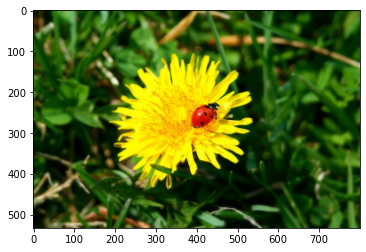

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

image = plt.imread('./images/ladybug.png')
plt.imshow(image)

In [5]:
image.shape

(533, 800, 3)

In [6]:
X = image.reshape(-1, 3)
X.shape

(426400, 3)

In [7]:
533 * 800   # 1열로 나열됨

426400

In [11]:
Kmeans = KMeans(n_clusters=8, random_state=42)   # 비슷한 애들을 8개로 묶어줌
Kmeans.fit(X)

KMeans(random_state=42)

In [12]:
Kmeans.labels_  # 군집된 레이블

array([1, 1, 1, ..., 4, 1, 1])

In [13]:
import numpy as np
np.unique(Kmeans.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [14]:
Kmeans.labels_.shape

(426400,)

In [15]:
Kmeans.cluster_centers_    # 각 그룹의 중심이 되는 색상 정보 RGB

array([[0.9836374 , 0.9359338 , 0.02574807],
       [0.02289337, 0.11064845, 0.00578197],
       [0.21914783, 0.38675755, 0.05800817],
       [0.75775605, 0.21225454, 0.0445884 ],
       [0.09990625, 0.2542204 , 0.01693457],
       [0.6126616 , 0.63010883, 0.38751987],
       [0.37212682, 0.5235918 , 0.15730345],
       [0.88459074, 0.7256049 , 0.03442054]], dtype=float32)

In [17]:
# 각 그룹을 대표하는 RGB 값으로 426400개의 픽셀을 대체
segmented_img = Kmeans.cluster_centers_[Kmeans.labels_]    # 426400개의 index가 사용

In [18]:
segmented_img.shape

(426400, 3)

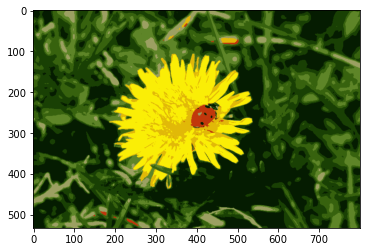

In [20]:
segmented_img = segmented_img.reshape(image.shape)
plt.imshow(segmented_img)

In [29]:
segmented_imgs = []
n_colors= [10, 8, 6, 4, 2]

for clusters in n_colors:
  kmeans = KMeans(n_clusters=clusters, random_state=42)
  kmeans.fit(X)
  segmented_img = kmeans.cluster_centers_[kmeans.labels_]
  segmented_img = segmented_img.reshape(image.shape)
  segmented_imgs.append(segmented_img)

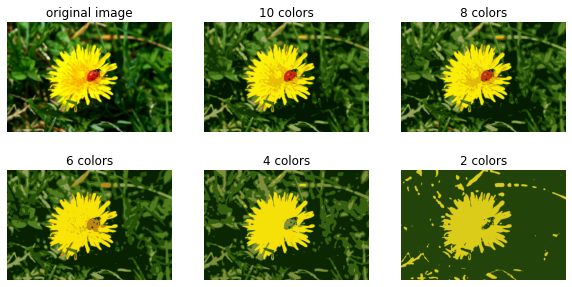

In [30]:
plt.figure(figsize=(10, 5))

plt.subplot(231)
plt.imshow(image)
plt.title('original image')
plt.axis('off')


for idx, n_clusters in enumerate(n_colors):
  plt.subplot(232+idx) # axis 지정
  plt.imshow(segmented_imgs[idx])
  plt.title('{} colors'.format(n_clusters))
  plt.axis('off')